# 1.- Import the libraries

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier


# 2.- Load Data

In [2]:
df = pd.read_csv("ML_Portuguese.csv")
df.head()

,school_GP,sex_male,age,address_urban,large_famsize,Parents_together,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,Dalc,Walc,absences_por,por_score,absences_math,math_score,math_pass,por_pass
0,True,False,18,True,True,False,4,4,False,True,...,4,3,1,1,4.0,11.0,6.0,6.0,0.0,1.0
1,True,False,17,True,True,True,1,1,False,True,...,5,3,1,1,2.0,11.0,4.0,6.0,0.0,1.0
2,True,False,15,True,False,True,1,1,False,True,...,4,3,2,3,6.0,12.0,NaN,NaN,NaN,1.0
3,True,False,15,True,True,True,4,2,True,True,...,3,2,1,1,0.0,14.0,NaN,NaN,NaN,1.0
4,True,False,16,True,True,True,3,3,True,True,...,4,3,1,2,0.0,13.0,NaN,NaN,NaN,1.0


In [3]:
df.shape

(649, 30)

In [4]:
df.dtypes

school_GP              bool
sex_male               bool
age                   int64
address_urban          bool
large_famsize          bool
Parents_together       bool
Medu                  int64
Fedu                  int64
Mjob                   bool
Fjob                   bool
traveltime            int64
studytime             int64
failures              int64
schoolsup              bool
famsup                 bool
paid                   bool
activities             bool
nursery                bool
internet               bool
romantic               bool
famrel                int64
freetime              int64
Dalc                  int64
Walc                  int64
absences_por        float64
por_score           float64
absences_math       float64
math_score          float64
math_pass           float64
por_pass            float64
dtype: object

# 3.- Manage null values

(In future improvements maybe we could replace null values with mean, mode, or average)

In [5]:
df.isnull()

,school_GP,sex_male,age,address_urban,large_famsize,Parents_together,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,Dalc,Walc,absences_por,por_score,absences_math,math_score,math_pass,por_pass
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
645,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isnull().sum()

school_GP             0
sex_male              0
age                   0
address_urban         0
large_famsize         0
Parents_together      0
Medu                  0
Fedu                  0
Mjob                  0
Fjob                  0
traveltime            0
studytime             0
failures              0
schoolsup             0
famsup                0
paid                  0
activities            0
nursery               0
internet              0
romantic              0
famrel                0
freetime              0
Dalc                  0
Walc                  0
absences_por          0
por_score             0
absences_math       487
math_score          487
math_pass           487
por_pass              0
dtype: int64

In [7]:
df = df.drop(columns=['absences_math', 'math_score', 'math_pass'])

In [8]:
df.isnull().sum()

school_GP           0
sex_male            0
age                 0
address_urban       0
large_famsize       0
Parents_together    0
Medu                0
Fedu                0
Mjob                0
Fjob                0
traveltime          0
studytime           0
failures            0
schoolsup           0
famsup              0
paid                0
activities          0
nursery             0
internet            0
romantic            0
famrel              0
freetime            0
Dalc                0
Walc                0
absences_por        0
por_score           0
por_pass            0
dtype: int64

In [9]:
df.shape

(649, 27)

In [10]:
df['por_pass'].unique()

array([1., 0.])

In [11]:
print(df.columns)

Index(['school_GP', 'sex_male', 'age', 'address_urban', 'large_famsize',
       'Parents_together', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'internet', 'romantic', 'famrel', 'freetime', 'Dalc', 'Walc',
       'absences_por', 'por_score', 'por_pass'],
      dtype='object')


In [12]:
df.dtypes

school_GP              bool
sex_male               bool
age                   int64
address_urban          bool
large_famsize          bool
Parents_together       bool
Medu                  int64
Fedu                  int64
Mjob                   bool
Fjob                   bool
traveltime            int64
studytime             int64
failures              int64
schoolsup              bool
famsup                 bool
paid                   bool
activities             bool
nursery                bool
internet               bool
romantic               bool
famrel                int64
freetime              int64
Dalc                  int64
Walc                  int64
absences_por        float64
por_score           float64
por_pass            float64
dtype: object

### En este caso no hace falta aplicar OneHotEncoding porque las columnas ya está formateadas binariamente con "Yes", "No", "True", "False"

# 4.- Ver correlaciones

(usaremos visualizaciones)

## Matriz de correlación

In [13]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                  school_GP  sex_male       age  address_urban  large_famsize  \
school_GP          1.000000  0.083050 -0.087170       0.354520       0.022252   
sex_male           0.083050  1.000000 -0.043662       0.025503      -0.098205   
age               -0.087170 -0.043662  1.000000      -0.025848       0.002470   
address_urban      0.354520  0.025503 -0.025848       1.000000      -0.046113   
large_famsize      0.022252 -0.098205  0.002470      -0.046113       1.000000   
Parents_together  -0.028120  0.064700 -0.005631      -0.094635       0.239608   
Medu               0.254787  0.119127 -0.107832       0.190320       0.014325   
Fedu               0.209806  0.083913 -0.121050       0.141493       0.039538   
Mjob               0.199124  0.133779 -0.088980       0.165307       0.008830   
Fjob               0.136385  0.053666 -0.055275      -0.023822       0.021608   
traveltime        -0.252936  0.040880  0.034490      -0.344902      -0.012794   
studytime          0.137857 

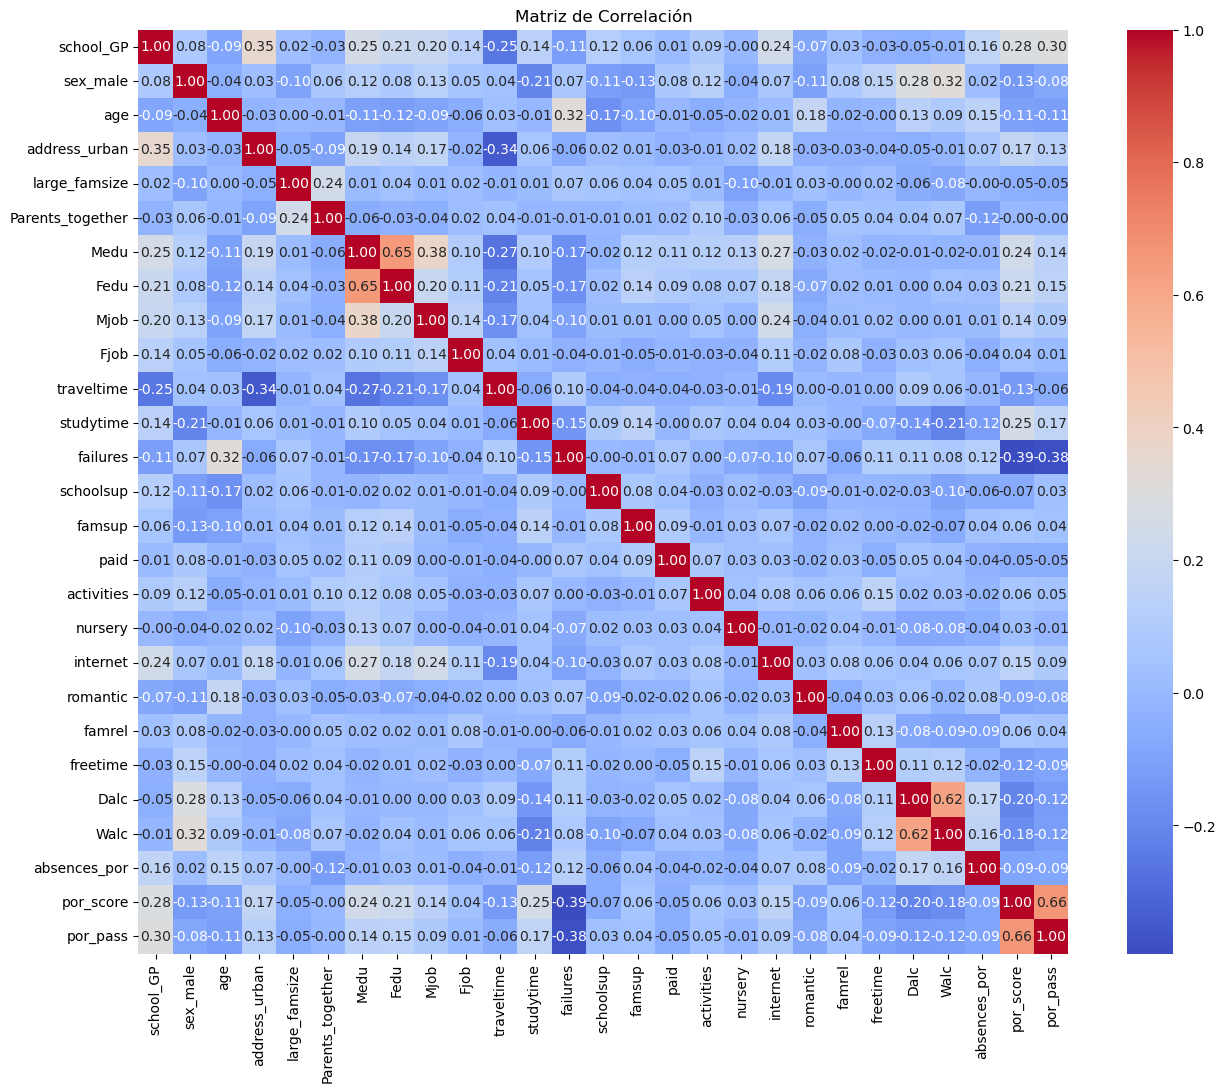

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


## Matriz de correlacion de por_pass con las demás variables

In [15]:
# Matriz de correlación de 'por_pass' con las demás variables
correlation_with_por_pass = df.corr()['por_pass'].sort_values(ascending=False)

# Mostrar el resultado
print(correlation_with_por_pass)


por_pass            1.000000
por_score           0.663157
school_GP           0.297217
studytime           0.165111
Fedu                0.146249
Medu                0.144803
address_urban       0.126663
internet            0.088215
Mjob                0.086210
activities          0.047276
famrel              0.044987
famsup              0.037903
schoolsup           0.034527
Fjob                0.009168
Parents_together   -0.004241
nursery            -0.007751
large_famsize      -0.052215
paid               -0.053708
traveltime         -0.057869
sex_male           -0.078222
romantic           -0.081177
absences_por       -0.087483
freetime           -0.093349
age                -0.110722
Walc               -0.116249
Dalc               -0.123627
failures           -0.380237
Name: por_pass, dtype: float64


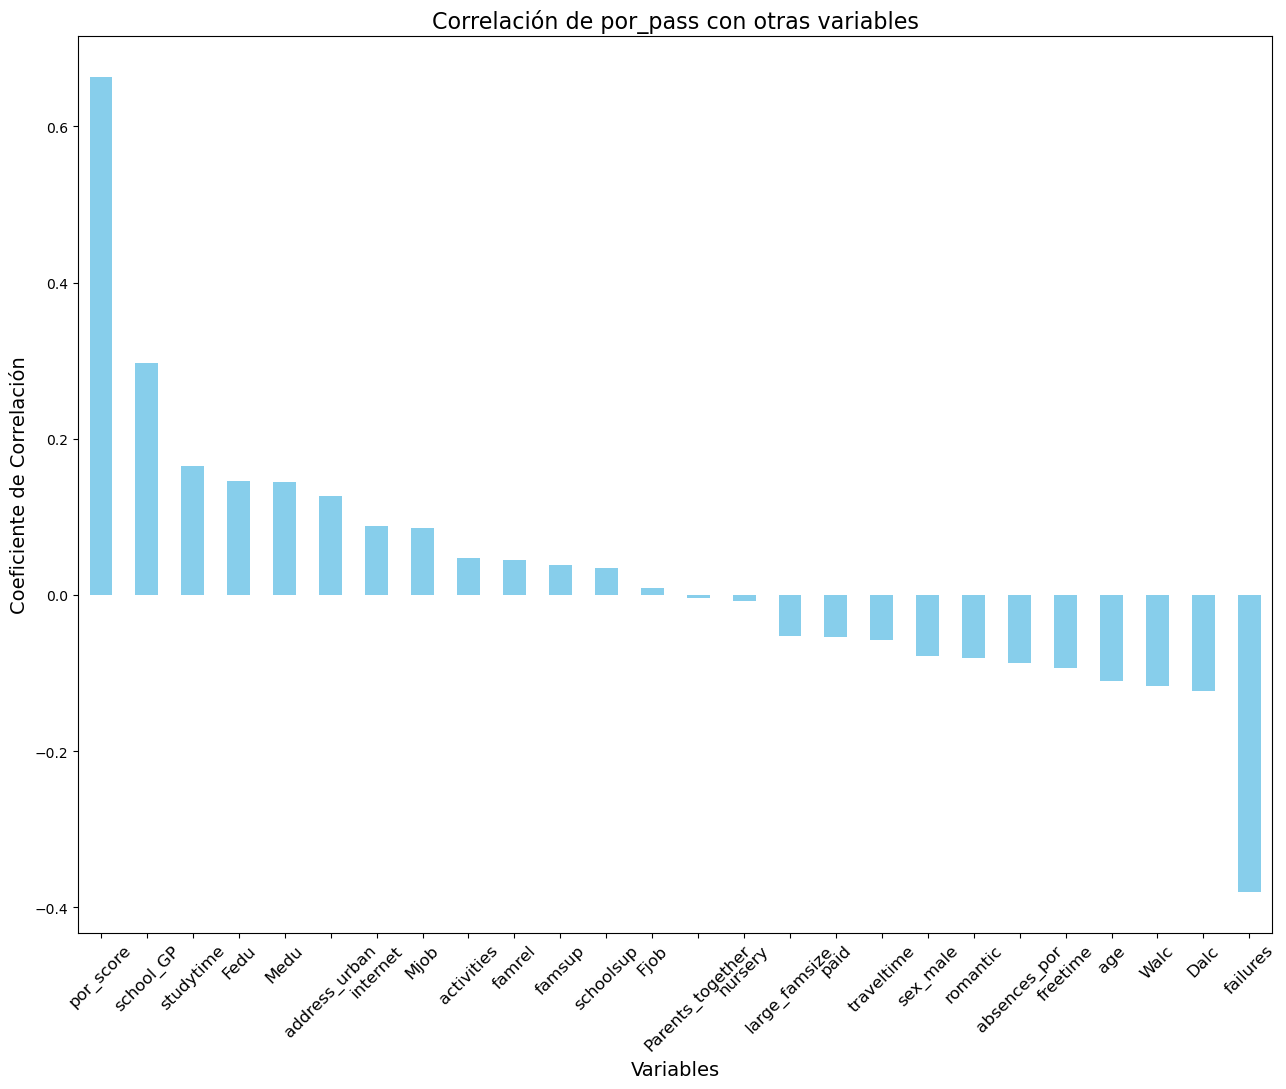

In [16]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras para las correlaciones
plt.figure(figsize=(13, 11))
correlation_with_por_pass.drop('por_pass').plot(kind='bar', color='skyblue')
plt.title('Correlación de por_pass con otras variables', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Coeficiente de Correlación', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


In [17]:
df= df.drop(columns = ['por_score'])

In [18]:
# Crear la matriz de correlación completa
correlation_matrix = df.corr()

# Filtrar solo las correlaciones relacionadas con 'por_pass'
correlation_with_por_pass = correlation_matrix[['por_pass']]

# Mostrar la matriz de correlación para 'por_pass'
print(correlation_with_por_pass)


                  por_pass
school_GP         0.297217
sex_male         -0.078222
age              -0.110722
address_urban     0.126663
large_famsize    -0.052215
Parents_together -0.004241
Medu              0.144803
Fedu              0.146249
Mjob              0.086210
Fjob              0.009168
traveltime       -0.057869
studytime         0.165111
failures         -0.380237
schoolsup         0.034527
famsup            0.037903
paid             -0.053708
activities        0.047276
nursery          -0.007751
internet          0.088215
romantic         -0.081177
famrel            0.044987
freetime         -0.093349
Dalc             -0.123627
Walc             -0.116249
absences_por     -0.087483
por_pass          1.000000


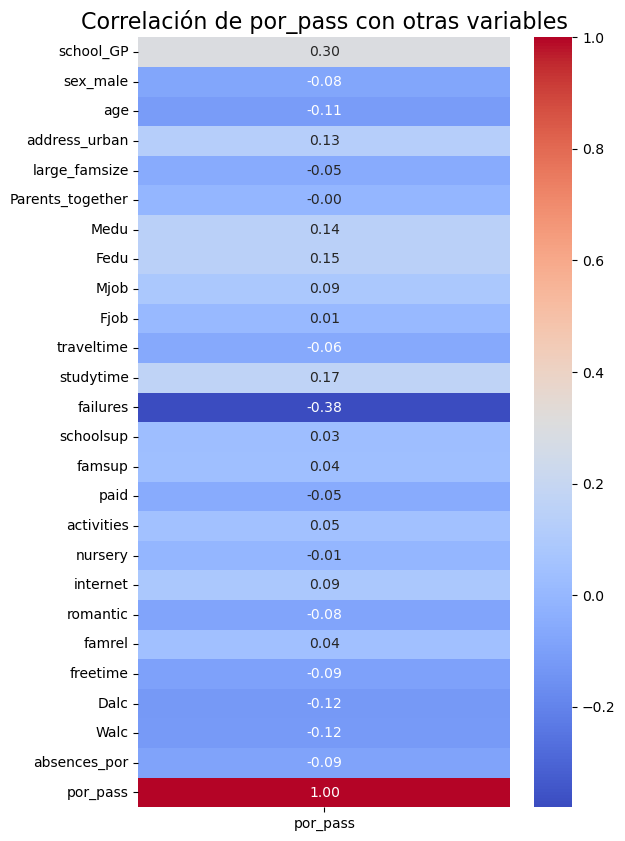

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(6, 10))

# Crear el mapa de calor solo para las correlaciones de 'por_pass'
sns.heatmap(correlation_with_por_pass, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)

plt.title('Correlación de por_pass con otras variables', fontsize=16)
plt.show()


---------------------------------------

# 5.- Dividir datos en Train y Test  (Train Test Split)

In [20]:
target = df['por_pass']
features = df.drop(columns = ['por_pass'])

In [21]:
print(target)
print(features)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
644    1.0
645    1.0
646    0.0
647    1.0
648    1.0
Name: por_pass, Length: 649, dtype: float64
     school_GP  sex_male  age  address_urban  large_famsize  Parents_together  \
0         True     False   18           True           True             False   
1         True     False   17           True           True              True   
2         True     False   15           True          False              True   
3         True     False   15           True           True              True   
4         True     False   16           True           True              True   
..         ...       ...  ...            ...            ...               ...   
644      False     False   19          False           True              True   
645      False     False   18           True          False              True   
646      False     False   18           True           True              True   
647      False      True 

In [22]:
X = features
y = target

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# Comprobamos la dimensión de los subconjuntos de datos

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (519, 25)
X_test shape: (130, 25)
y_train shape: (519,)
y_test shape: (130,)


----------------------------------------------------------------------

# 6.- Feature selection 
(Vamos a seleccionar las características que tienen mayor importancia)

### Método 1: sorting values basado en correlaciones

In [25]:
# Calcular las correlaciones
# correlation_matrix = df.corr()

# Seleccionar correlaciones con la variable objetivo (por_pass)
# correlation_with_por_pass = correlation_matrix['por_pass'].sort_values(ascending=False)

# Filtrar características con una correlación significativa (por ejemplo, > 0.2 o < -0.2)
# significant_features = correlation_with_por_pass[abs(correlation_with_por_pass) > 0.2]
# print("Características relevantes:", significant_features.index)


### Método 2: usando SelectKBest

Este método selecciona las k mejores características según una puntuación estadística, como ANOVA (f_classif).

In [26]:

# Seleccionar las 10 mejores características
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)  # Ajustar y transformar X_train
X_test_selected = selector.transform(X_test)  # Transformar X_test

# Entrenar el modelo
estimator = DecisionTreeClassifier(max_depth=5, random_state=42)
bagging_clf = BaggingClassifier(estimator=estimator, n_estimators=10, random_state=42)
bagging_clf.fit(X_train_selected, y_train)

# Predecir en los datos de prueba
y_pred = bagging_clf.predict(X_test_selected)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")

Precisión del modelo: 0.9


In [27]:

# Ver las características seleccionadas
#selected_features = X_train.columns[selector.get_support()]
#print("Características seleccionadas:", selected_features)


### Método 3: Con el decision tree

In [28]:

# Entrenar un árbol de decisión
#tree = DecisionTreeClassifier(random_state=42)
#tree.fit(X, y)

# Obtener la importancia de las características
#importances = tree.feature_importances_
#feature_importance_df = pd.DataFrame({
#    'Feature': X.columns,
#    'Importance': importances
#}).sort_values(by='Importance', ascending=False)

#print(feature_importance_df)


-----------------------------------------------------------------------------------------------------

**Model Selection** 

- Bagging and Pasting

In [29]:


# Dividir los datos en entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de Decision Tree
estimator = DecisionTreeClassifier(max_depth=5, random_state=42)

# Crear el modelo Bagging Classifier
bagging_clf = BaggingClassifier(estimator=estimator, n_estimators=10, random_state=42)

# Entrenar el modelo
bagging_clf.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = bagging_clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy}")


Precisión del modelo: 0.8769230769230769


# Pipeline para automatizacion


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Crear un pipeline con selección de características y modelo
pipeline = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('bagging', BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=10, random_state=42))
])

# Entrenar el pipeline
pipeline.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo con Pipeline: {accuracy}")


Precisión del modelo con Pipeline: 0.9


- Random Forests

- Gradient Boosting

- Adaptive Boosting

Which model is the best and why?